In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
btc = pd.read_csv("Bitcoin.csv")

In [3]:
btc.head()

,Date,Open,High,Low,Close,Volume,Currency
0,2019-06-18,9128.269531,9149.763672,8988.606445,9062.045898,952850.0,USD
1,2019-06-19,9068.174805,9277.677734,9051.094727,9271.459961,131077.0,USD
2,2019-06-20,9271.567383,9573.689453,9209.416992,9519.200195,83052.0,USD
3,2019-06-21,9526.833984,10130.935547,9526.833984,10127.998047,76227.0,USD
4,2019-06-22,10151.890625,11171.013672,10083.189453,10719.981445,84485.0,USD


# Exploratory Data Analysis

In this section, we explore the structure and behaviour of the Bitcoin dataset through visualisations and statistics. This helps identify trends, relationships and potential data quality issues.

In [6]:
btc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1151 entries, 0 to 1150
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      1151 non-null   object 
 1   Open      1151 non-null   float64
 2   High      1151 non-null   float64
 3   Low       1151 non-null   float64
 4   Close     1151 non-null   float64
 5   Volume    1151 non-null   float64
 6   Currency  1151 non-null   object 
dtypes: float64(5), object(2)
memory usage: 63.1+ KB


##Converting btc[Date] to a DateTime format

To perform time-based analysis and modeling, we convert the 'Date' column to a proper datetime format. This enables time-series operations and clean plotting.

In [9]:
btc.Date = pd.to_datetime(btc['Date'])

In [10]:
btc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1151 entries, 0 to 1150
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      1151 non-null   datetime64[ns]
 1   Open      1151 non-null   float64       
 2   High      1151 non-null   float64       
 3   Low       1151 non-null   float64       
 4   Close     1151 non-null   float64       
 5   Volume    1151 non-null   float64       
 6   Currency  1151 non-null   object        
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 63.1+ KB


In [11]:
btc.describe()

,Date,Open,High,Low,Close,Volume
count,1151,1151.000000,1151.000000,1151.000000,1151.000000,1.151000e+03
mean,2021-01-15 05:41:32.788879104,26488.652992,27528.416710,25416.606967,26496.733082,2.874051e+07
min,2019-06-18 00:00:00,4943.832520,5338.512695,0.076853,4936.755371,0.000000e+00
25%,2020-03-31 12:00:00,9706.758301,10090.012695,9360.636230,9712.636719,7.495500e+03
50%,2021-01-13 00:00:00,20873.337891,21867.822266,20245.201172,20902.404297,1.864334e+06
75%,2021-10-27 12:00:00,41782.333984,42749.439453,40890.394531,41782.333984,4.076471e+07
max,2022-08-23 00:00:00,67470.437500,85563.984375,66072.343750,67502.421875,5.791706e+08
std,NaN,17963.101635,18432.925246,17484.604545,17952.113609,5.202999e+07


In [12]:
btc.isnull().sum()

Date        0
Open        0
High        0
Low         0
Close       0
Volume      0
Currency    0
dtype: int64

#Plotting Bitcoin Close Price over time

This line chart visualises Bitcoin's Close Price over Time. It helps identify major trends, cycles, and spikes, which are essential for understanding historical market behaviour.

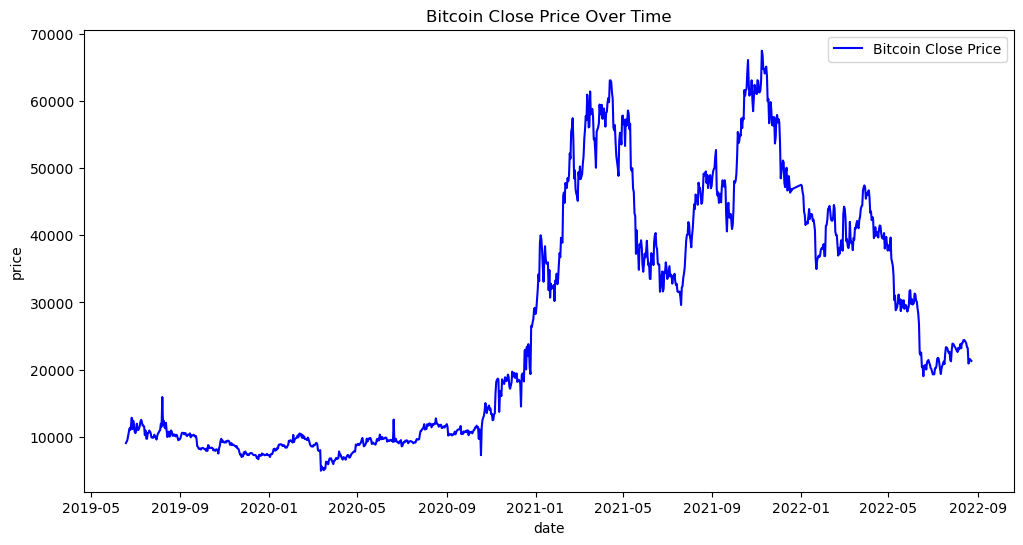

In [15]:
plt.figure(figsize=(12, 6))
plt.plot(pd.to_datetime(btc['Date']), btc['Close'], label="Bitcoin Close Price", color="blue")
plt.title("Bitcoin Close Price Over Time")
plt.xlabel("date")
plt.ylabel("price")
plt.legend()
plt.show()

#Plotting Bitcoin Open Price over time

This plot shows the Bitcoin Open prices, allowing us to compare how prices started each trading day and examine long-term shifts in opening trends.

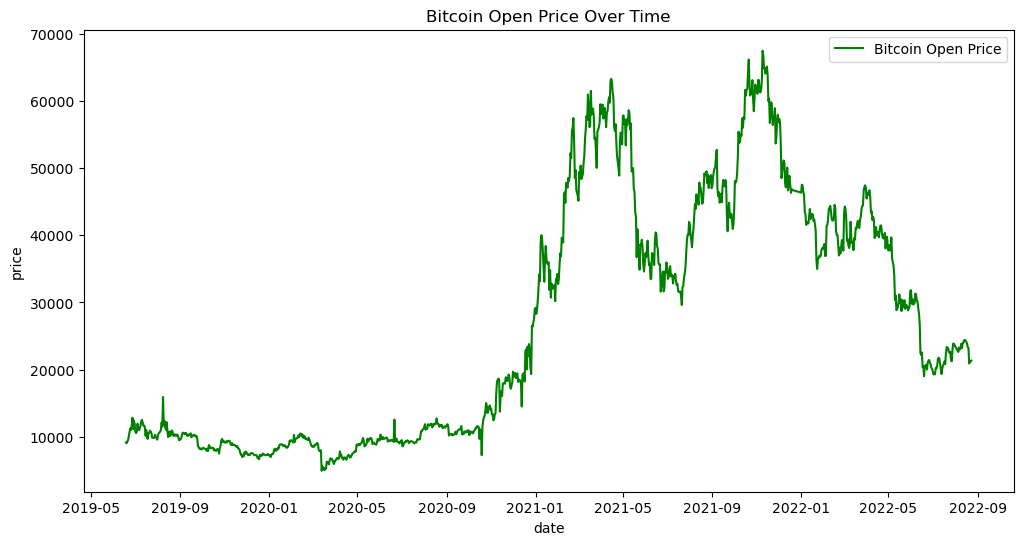

In [18]:
plt.figure(figsize=(12, 6))
plt.plot(btc['Date'], btc['Open'], label="Bitcoin Open Price", color="green")
plt.title("Bitcoin Open Price Over Time")
plt.xlabel("date")
plt.ylabel("price")
plt.legend()
plt.show()

#Plot comparing Bitcoin's daily Low and High Prices to visualise volatility

This chart compares the daily high and low prices to reveal volatility. A wider gap indicates increased trading uncertainty and market movement within a single day.

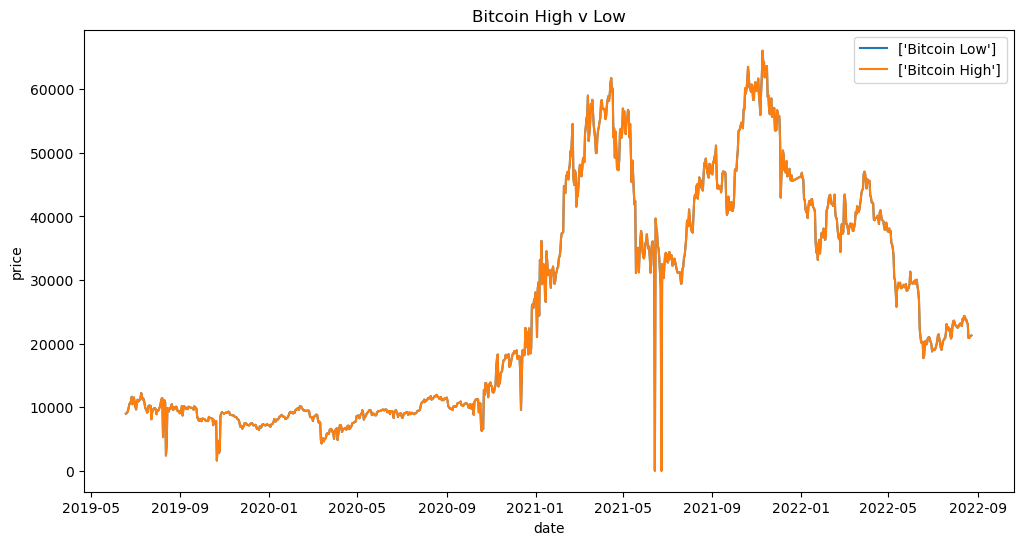

In [21]:
plt.figure(figsize=(12, 6))
plt.plot(pd.to_datetime(btc['Date']), btc['Low'], label=["Bitcoin Low"])
plt.plot(pd.to_datetime(btc['Date']), btc['Low'], label=['Bitcoin High'])
plt.title("Bitcoin High v Low")
plt.xlabel("date")
plt.ylabel("price")
plt.legend()
plt.show()

#Plot comparing Bitcoin's Open and Close Prices

By comparing the opening and closing prices, we can observe trends and  patterns in Bitcoin's price action.

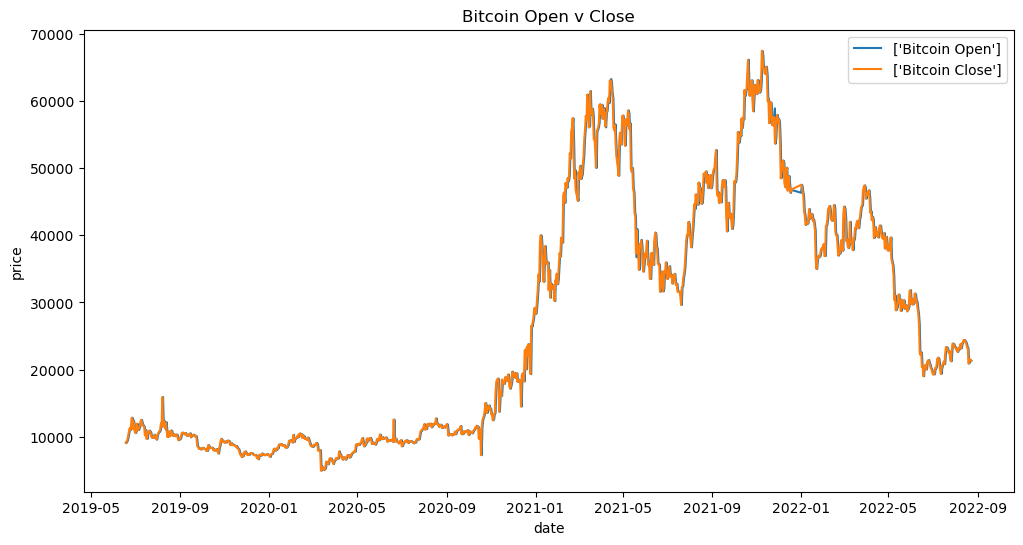

In [24]:
plt.figure(figsize=(12, 6))
plt.plot(pd.to_datetime(btc['Date']), btc['Open'], label=['Bitcoin Open'])
plt.plot(pd.to_datetime(btc['Date']), btc['Close'], label=['Bitcoin Close'])
plt.title('Bitcoin Open v Close')
plt.xlabel("date")
plt.ylabel("price")
plt.legend()
plt.show()

#Detecting Outliers

Outlier detection helps identify extreme values that may skew model performance. We inspect the numeric features to determine whether certain values need to be removed or handled differently.

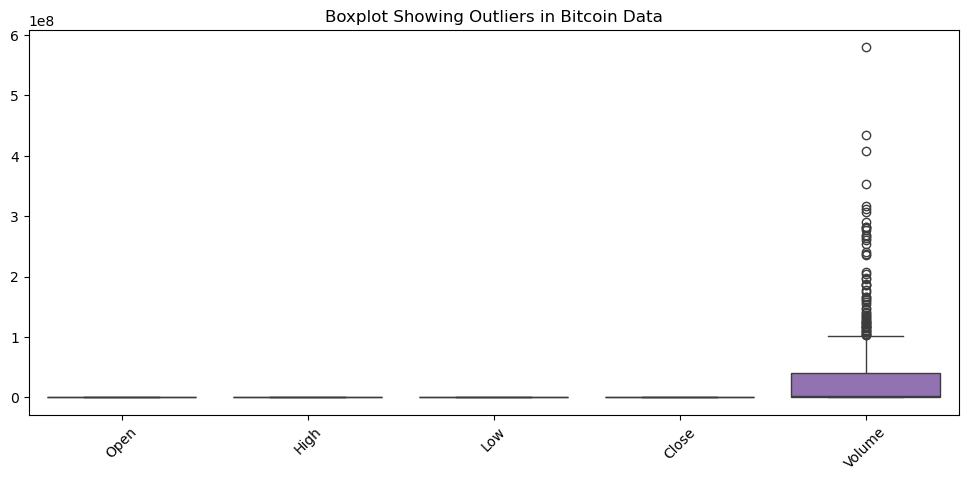

In [27]:
#Using boxplot
plt.figure(figsize=(12, 5))
sns.boxplot(data=btc)
plt.xticks(rotation=45)
plt.title("Boxplot Showing Outliers in Bitcoin Data")
plt.show()

In [28]:
#Using Quantile differences
btc_selected = btc[['Close', 'Open', 'High', 'Low', 'Volume']]

Q1 = btc_selected.quantile(0.25)
Q3 = btc_selected.quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers = ((btc_selected < (Q1 - 1.5 * IQR)) | (btc_selected > (Q3 + 1.5 * IQR))).any(axis=1)

# Show number of outliers
print(f"Number of outliers detected: {outliers.sum()}")


Number of outliers detected: 64


#The Volume of Crytocurrencies is highly volatile and fluctuates therefore, large Volume values cannot be considered as outliers. Removing them risks deleting valuable patterns.

# Feature Engineering

We create new features based on existing columns to capture meaningful patterns. This enhances model performance by revealing relationships that may not be obvious from raw data alone.

In [32]:
#Creating Price Change
btc['Price Change'] = btc['Close'] - btc['Open']

In [33]:
#Creating Price Spread
btc['Price Spread']= btc['High']- btc['Low']

In [34]:
#Creating Future Close
btc['Future Close'] = btc['Close'].shift(-1)

In [35]:
btc.tail()

,Date,Open,High,Low,Close,Volume,Currency,Price Change,Price Spread,Future Close
1146,2022-08-18,23331.542969,23567.285156,23152.455078,23222.242188,4546110.0,USD,-109.300781,414.830078,20902.404297
1147,2022-08-19,23219.097656,23219.097656,20898.304688,20902.404297,13856579.0,USD,-2316.693359,2320.792969,21153.019531
1148,2022-08-20,20899.923828,21344.845703,20864.435547,21153.019531,7139073.0,USD,253.095703,480.410156,21561.177734
1149,2022-08-21,21153.412109,21695.794922,21125.320312,21561.177734,6657571.0,USD,407.765625,570.474609,21303.986328
1150,2022-08-23,21337.318359,21412.892578,21280.458984,21303.986328,6955056.0,USD,-33.332031,132.433594,NaN


In [36]:
btc.isnull().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Currency        0
Price Change    0
Price Spread    0
Future Close    1
dtype: int64

In [37]:
#Removing the null row to ease prediction processing
btc.dropna(inplace=True)
btc

,Date,Open,High,Low,Close,Volume,Currency,Price Change,Price Spread,Future Close
0,2019-06-18,9128.269531,9149.763672,8988.606445,9062.045898,952850.0,USD,-66.223633,161.157227,9271.459961
1,2019-06-19,9068.174805,9277.677734,9051.094727,9271.459961,131077.0,USD,203.285156,226.583008,9519.200195
2,2019-06-20,9271.567383,9573.689453,9209.416992,9519.200195,83052.0,USD,247.632812,364.272461,10127.998047
3,2019-06-21,9526.833984,10130.935547,9526.833984,10127.998047,76227.0,USD,601.164062,604.101562,10719.981445
4,2019-06-22,10151.890625,11171.013672,10083.189453,10719.981445,84485.0,USD,568.090820,1087.824219,11246.518555
...,...,...,...,...,...,...,...,...,...,...
1145,2022-08-17,23882.148438,24390.460938,23267.894531,23326.863281,7047422.0,USD,-555.285156,1122.566406,23222.242188
1146,2022-08-18,23331.542969,23567.285156,23152.455078,23222.242188,4546110.0,USD,-109.300781,414.830078,20902.404297
1147,2022-08-19,23219.097656,23219.097656,20898.304688,20902.404297,13856579.0,USD,-2316.693359,2320.792969,21153.019531
1148,2022-08-20,20899.923828,21344.845703,20864.435547,21153.019531,7139073.0,USD,253.095703,480.410156,21561.177734


In [38]:
btc.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Currency',
       'Price Change', 'Price Spread', 'Future Close'],
      dtype='object')

#We need to drop the Currency variable as it contains one unique value and is an object column. Including this variable will lead to unnecessary errors

In [40]:
btc= btc.drop('Currency', axis=1)
btc

,Date,Open,High,Low,Close,Volume,Price Change,Price Spread,Future Close
0,2019-06-18,9128.269531,9149.763672,8988.606445,9062.045898,952850.0,-66.223633,161.157227,9271.459961
1,2019-06-19,9068.174805,9277.677734,9051.094727,9271.459961,131077.0,203.285156,226.583008,9519.200195
2,2019-06-20,9271.567383,9573.689453,9209.416992,9519.200195,83052.0,247.632812,364.272461,10127.998047
3,2019-06-21,9526.833984,10130.935547,9526.833984,10127.998047,76227.0,601.164062,604.101562,10719.981445
4,2019-06-22,10151.890625,11171.013672,10083.189453,10719.981445,84485.0,568.090820,1087.824219,11246.518555
...,...,...,...,...,...,...,...,...,...
1145,2022-08-17,23882.148438,24390.460938,23267.894531,23326.863281,7047422.0,-555.285156,1122.566406,23222.242188
1146,2022-08-18,23331.542969,23567.285156,23152.455078,23222.242188,4546110.0,-109.300781,414.830078,20902.404297
1147,2022-08-19,23219.097656,23219.097656,20898.304688,20902.404297,13856579.0,-2316.693359,2320.792969,21153.019531
1148,2022-08-20,20899.923828,21344.845703,20864.435547,21153.019531,7139073.0,253.095703,480.410156,21561.177734


#Splitting Bitcoin Dataset for Finding Important Features

In [42]:
btc_features = btc.iloc[:, :-1]    #Features
btc_target = btc['Future Close']    #Target

# Finding Important Features

We use both correlation analysis and model-based methods to identify features that most influence Bitcoin's Future Close Price.

In [45]:
#Using Correlation Matrix
correlation_matrix = btc.corr()
correlated_features = correlation_matrix['Future Close'].abs().sort_values(ascending=False)
print(correlated_features)

Future Close    1.000000
Close           0.997154
Open            0.994890
Low             0.990721
High            0.985112
Date            0.693133
Volume          0.595016
Price Spread    0.223681
Price Change    0.021859
Name: Future Close, dtype: float64


In [46]:
correlation_threshold = 0.5
selected_features_filter = correlated_features[correlated_features > correlation_threshold].index.tolist()
selected_features_filter.remove('Future Close') #removing 'Future Close' as it is the target variable
print(selected_features_filter)

['Close', 'Open', 'Low', 'High', 'Date', 'Volume']


# Training and Testing Algorithms 

#We first split the dataset and train and test the data with the decision tree regressor to obtain Important Features as a second metric 

#Time-series Train-Test Split
For time-series models, we avoid random splitting. We use the first 80% of the data for training and the remaining 20% for testing to simulate real-world forecasting.

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
T = btc[['Open', 'High', 'Low', 'Close', 'Volume','Price Change', 'Price Spread']] 
y = btc_target

In [52]:
X_train, X_test, y_train, y_test = train_test_split(T, y, test_size=0.2, random_state=42)

In [53]:
from sklearn.tree import DecisionTreeRegressor

#Fitting the Decision Tree algorithm to show Important Features of the Dataset for making Predictions

In [55]:
#Fitting the model
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(T, y)

feature_importance = tree_model.feature_importances_

importance_df = pd.DataFrame({'Feature': T.columns, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

        Feature  Importance
3         Close    0.991844
1          High    0.003681
2           Low    0.001333
4        Volume    0.000876
0          Open    0.000865
6  Price Spread    0.000725
5  Price Change    0.000675


#Using Permutation_Importance to show Important Features based on the tree model.

In [57]:
from sklearn.inspection import permutation_importance

# Fit model
tree_model.fit(X_train, y_train)

# Get permutation importance
results = permutation_importance(tree_model, X_test, y_test)
feature_importance_p = results.importances_mean
#print(feature_importance_p)

importance_bt = pd.DataFrame({'Feature': T.columns, 'Importance': feature_importance_p})
importance_bt = importance_bt.sort_values(by='Importance', ascending=False)

print(importance_bt)

        Feature  Importance
3         Close    1.907561
1          High    0.007241
0          Open    0.006777
4        Volume    0.001780
2           Low    0.001700
6  Price Spread    0.000816
5  Price Change    0.000166


In [58]:
#printing top 5 important features
print(importance_bt[:5])

  Feature  Importance
3   Close    1.907561
1    High    0.007241
0    Open    0.006777
4  Volume    0.001780
2     Low    0.001700


Since both Correlation and Decision Tree Feature Importance show 'close', 'open', 'high', 'low' and 'volume' as the most important features, they are going to be used as the features for model training

Since it is a time- series dataset, the first values should be used for training and the recent or last values should be used for testing. We first divide the feature data into train and test, selecting the first 80% for train and the remaining recent 20% for test.

In [61]:
btc.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Price Change',
       'Price Spread', 'Future Close'],
      dtype='object')

#But first we need to create a new dataset only including the important features and the target. 
We filter the dataset to include only the most important features and the target column, ensuring our models are trained on the most relevant input.


In [63]:
btc_new = btc[['Open', 'High', 'Low', 'Close', 'Volume', 'Future Close']]

In [64]:
btc_new

,Open,High,Low,Close,Volume,Future Close
0,9128.269531,9149.763672,8988.606445,9062.045898,952850.0,9271.459961
1,9068.174805,9277.677734,9051.094727,9271.459961,131077.0,9519.200195
2,9271.567383,9573.689453,9209.416992,9519.200195,83052.0,10127.998047
3,9526.833984,10130.935547,9526.833984,10127.998047,76227.0,10719.981445
4,10151.890625,11171.013672,10083.189453,10719.981445,84485.0,11246.518555
...,...,...,...,...,...,...
1145,23882.148438,24390.460938,23267.894531,23326.863281,7047422.0,23222.242188
1146,23331.542969,23567.285156,23152.455078,23222.242188,4546110.0,20902.404297
1147,23219.097656,23219.097656,20898.304688,20902.404297,13856579.0,21153.019531
1148,20899.923828,21344.845703,20864.435547,21153.019531,7139073.0,21561.177734


In [65]:
X = btc_new.iloc[:, :-1]   #Feature variables
z = btc_new.iloc[:,-1]        #Target variable                     

#Scaling The Feature Variables

We normalise the input features to ensure consistent scale.

In [68]:
from sklearn.preprocessing import StandardScaler

In [69]:
scaler = StandardScaler()

In [70]:
X_sc = scaler.fit_transform(X)

In [71]:
print(X_sc)

[[-0.96673084 -0.99739196 -0.93979805 -0.97146431 -0.53447503]
 [-0.97007641 -0.9904522  -0.93622406 -0.95979873 -0.55027045]
 [-0.95875321 -0.97439257 -0.92716889 -0.94599817 -0.55119355]
 ...
 [-0.18227097 -0.2340835  -0.25862804 -0.31188796 -0.28645048]
 [-0.31138324 -0.33576794 -0.26056517 -0.29792724 -0.41556869]
 [-0.29727112 -0.31672777 -0.24564398 -0.27519047 -0.42482371]]


In [72]:
z.head()

0     9271.459961
1     9519.200195
2    10127.998047
3    10719.981445
4    11246.518555
Name: Future Close, dtype: float64

# Model Training and Evaluation

We build, train, and evaluate several models; Random Forest Linear Regression and KNN, to predict Bitcoin's Future Close prices.

In [75]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [76]:
X_train= X_sc[:-230] #Training set feature variables
X_test= X_sc[-230:]   #Testing set feature variables
z_train = z.iloc[:-230]  #Training set target variable
z_test = z.iloc[-230:]   #Testing set target variable

#Random Forest

Random Forest is an ensemble model that averages predictions from multiple decision trees.

In [79]:
rd= RandomForestRegressor(random_state=1)
rd.fit(X_train,z_train)

rd_predict = rd.predict(X_test)
rd_predict[:5]

array([45417.73773437, 45583.92316406, 41462.10523437, 42557.2696875 ,
       42228.77273438])

In [80]:
z_test.head(5)

920    43559.152344
921    43043.125000
922    41543.519531
923    41795.062500
924    41978.855469
Name: Future Close, dtype: float64

In [81]:
#Evaluating the random forest model using mean squared error
mse=mean_squared_error(z_test,rd_predict,squared= False)
mse

C:\Users\rushd\anaconda3\anacc\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


1788.9631712902876

#Linear Regression

We apply linear regression as a baseline model to see how well a simple linear relationship explains the data.

In [84]:
lr = LinearRegression()
lr.fit(X_train,z_train )

lr_predict = lr.predict(X_test)
lr_predict[:5]

array([46002.54797411, 43866.16556705, 43097.93095562, 41720.96025218,
       41755.03810888])

In [85]:
#Evaluating the linear regression model using mean squared error
mse_lr=mean_squared_error(z_test,lr_predict,squared= False)
mse_lr

C:\Users\rushd\anaconda3\anacc\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


1220.6528365084505

#KNN

KNN predicts a value by averaging the feature values of the nearest neighbours.

In [88]:
kn = KNeighborsRegressor()
kn.fit(X_train,z_train )

kn_predict = kn.predict(X_test)
kn_predict[:5]

array([46004.76328125, 45143.79921875, 44991.990625  , 43406.0953125 ,
       43162.2       ])

In [89]:
##Evaluating the knn model using mean squared error
mse_kn=mean_squared_error(z_test,kn_predict,squared= False)
mse_kn

C:\Users\rushd\anaconda3\anacc\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


2924.8719989065366

In [90]:
#Creating a dataframe containing all results
btc_predictions = pd.DataFrame({'z_true': z_test, 'Random_Forest': rd_predict, 'Linear_Reg': lr_predict, 'KNN': kn_predict})
btc_predictions = btc_predictions.merge(btc['Date'], left_index = True, right_index = True)
btc_predictions = btc_predictions[['Date','z_true', 'Random_Forest', 'Linear_Reg', 'KNN']]

In [91]:
btc_predictions

,Date,z_true,Random_Forest,Linear_Reg,KNN
920,2022-01-04,43559.152344,45417.737734,46002.547974,46004.763281
921,2022-01-05,43043.125000,45583.923164,43866.165567,45143.799219
922,2022-01-06,41543.519531,41462.105234,43097.930956,44991.990625
923,2022-01-07,41795.062500,42557.269687,41720.960252,43406.095313
924,2022-01-08,41978.855469,42228.772734,41755.038109,43162.200000
...,...,...,...,...,...
1145,2022-08-17,23222.242188,21755.116045,23446.607951,21360.777344
1146,2022-08-18,20902.404297,20882.312881,23286.243446,21360.777344
1147,2022-08-19,21153.019531,20912.595039,21256.436879,21360.777344
1148,2022-08-20,21561.177734,21393.997744,21171.602222,21249.451562


# Visualising True Values against Predicted Results 

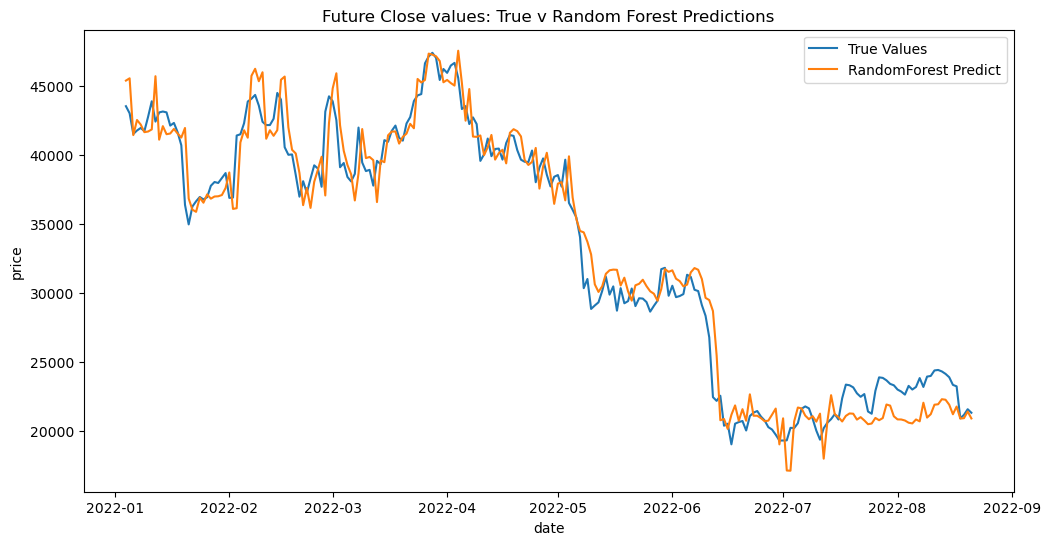

In [93]:
#plotting the true values on bitcoin againts the predicted results of the random forest model
plt.figure(figsize=(12, 6))
plt.plot(btc_predictions['Date'], btc_predictions[['z_true','Random_Forest']], label=["True Values", 'RandomForest Predict'])
plt.title("Future Close values: True v Random Forest Predictions")
plt.xlabel("date")
plt.ylabel("price")
plt.legend()
plt.show()

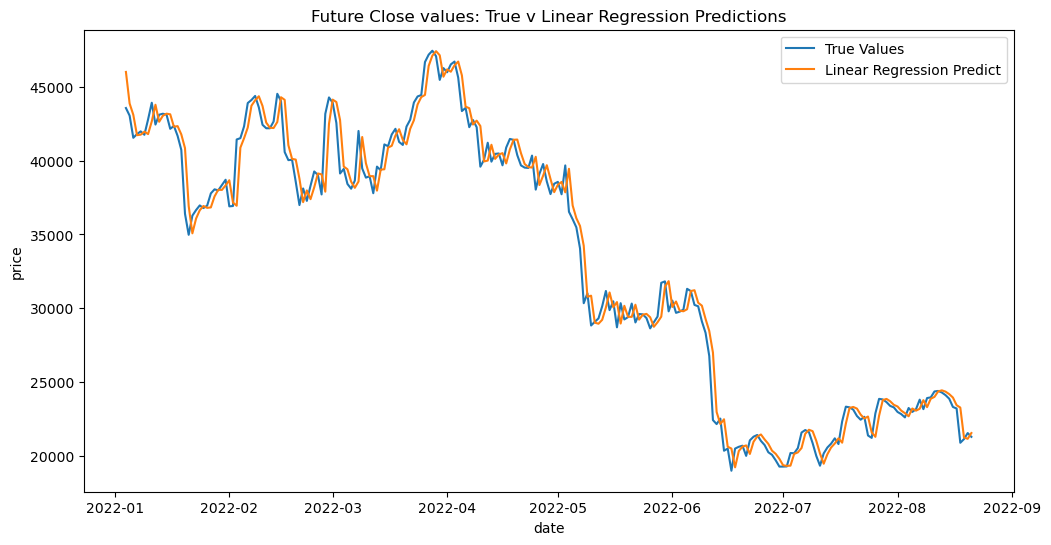

In [94]:
#plotting the true values on bitcoin againts the predicted results of the linear regression model
plt.figure(figsize=(12, 6))
plt.plot(btc_predictions['Date'], btc_predictions[['z_true','Linear_Reg']], label=["True Values", 'Linear Regression Predict'])
plt.title("Future Close values: True v Linear Regression Predictions")
plt.xlabel("date")
plt.ylabel("price")
plt.legend()
plt.show()

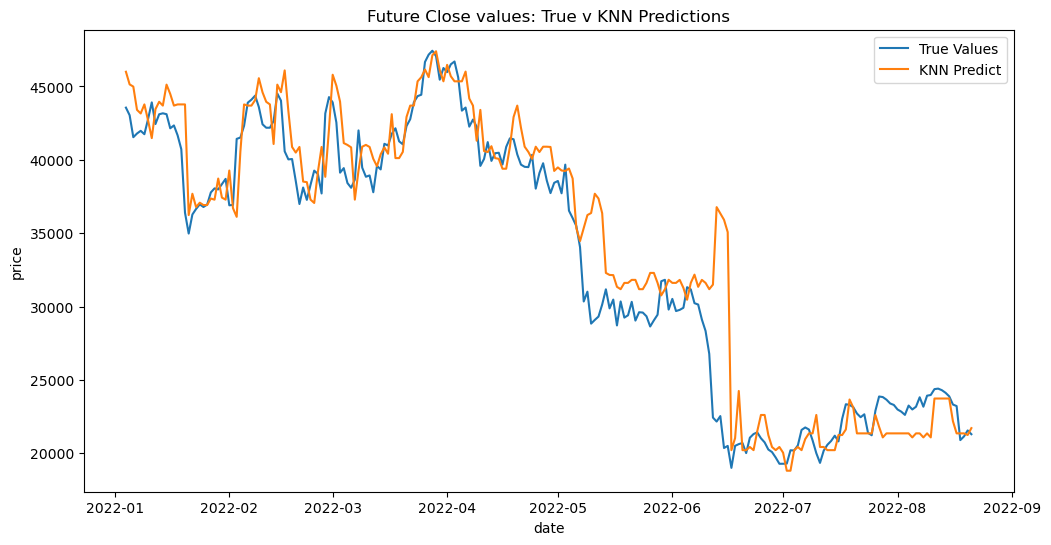

In [95]:
#plotting the true values on bitcoin againts the predicted results of the knn model
plt.figure(figsize=(12, 6))
plt.plot(btc_predictions['Date'], btc_predictions[['z_true','KNN']], label=["True Values", 'KNN Predict'])
plt.title("Future Close values: True v KNN Predictions")
plt.xlabel("date")
plt.ylabel("price")
plt.legend()
plt.show()